#Questions

Question 1:  What is Simple Linear Regression?
  - Simple Linear Regression is a statistical method used to model the relationship between two variables.
  - One is independent variable and the other one is dependent variable.
  - The goal is to find a linear relationship between these two variables.
  - This is done to predict the value of the dependent variable based on the value of the independent variable.

Question 2: What are the key assumptions of Simple Linear Regression?
  - **Assumptions of Simple Linear Regression:-**
    - Linearity:- The relationship between the independent variable and the dependent variable is linear.
    - Independence of Errors:- The errors are independent of each other.
    - Constant Variance of Errors:- The errors have constant variance across all levels of X.
    - Normality of Error:- The errors should be normally distributed.
    - Low Multicollinearity:- X varilables are not highly correlated.

Question 3: What is heteroscedasticity, and why is it important to address in regression models?
  - Heteroscedasticity is a situation in regression problem where the variance of the residuals is not constant across all levels of the independent variables.
  - Importance of addressing heteroscedasticity:-
    - It cause unreliable statistical inference.
    - It leads in incorrect predictions.
    - It violates regression assumptions.

Question 4: What is Multiple Linear Regression?
  - Multiple Linear Regression is a statistical technique used to model the relationship between one dependent variable and two or more independent variables.
  - It contain more than one X variables.
  - Each independent variable contributes to explaining the variation in the dependent variable.

Question 5: What is polynomial regression, and how does it differ from linear
regression?
  - Polynomial Regression is a type of regression analysis in which the relationship between the independent variable and the dependent variable is modeled as an n degree polynomial.
  - It allows non linear relationship between dependent and independent variables.
  - The degree of the polynomial determines the complexity of the model.

Regression Line: Y = 0.18 + 1.98 * X


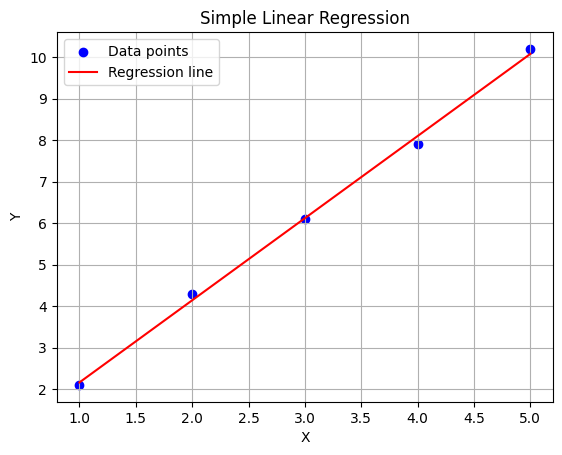

In [1]:
# Question 6:  Implement a Python program to fit a Simple Linear Regression model to the following sample data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.1, 4.3, 6.1, 7.9, 10.2]
# Plot the regression line over the data points.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5])
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)

slope = model.coef_[0]
intercept = model.intercept_

print(f"Regression Line: Y = {intercept:.2f} + {slope:.2f} * X")

Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred, color='red', label='Regression line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# Question 7: Fit a Multiple Linear Regression model on this sample data:
# ● Area = [1200, 1500, 1800, 2000]
# ● Rooms = [2, 3, 3, 4]
# ● Price = [250000, 300000, 320000, 370000]
# Check for multicollinearity using VIF and report the results.

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

Area = [1200, 1500, 1800, 2000]
Rooms = [2, 3, 3, 4]
Price = [250000, 300000, 320000, 370000]

data = pd.DataFrame({
    'Area': Area,
    'Rooms': Rooms,
    'Price': Price
})

X = data[['Area', 'Rooms']]
Y = data['Price']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()

print("Multiple Linear Regression Model Summary:")
print(model.summary())

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factors (VIF):")
print(vif_data)

Multiple Linear Regression Model Summary:
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Fri, 03 Oct 2025   Prob (F-statistic):             0.0377
Time:                        12:39:11   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const     

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


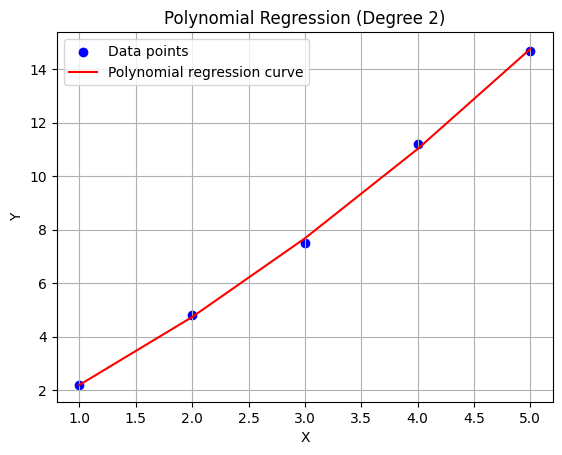

Intercept: 0.06000000000000938
Coefficients: [0.   1.94 0.2 ]


In [3]:
# Question 8:  Implement polynomial regression on the following data:
# ● X = [1, 2, 3, 4, 5]
# ● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
# Fit a 2nd-degree polynomial and plot the resulting curve.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)

Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, Y_pred, color='red', label='Polynomial regression curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


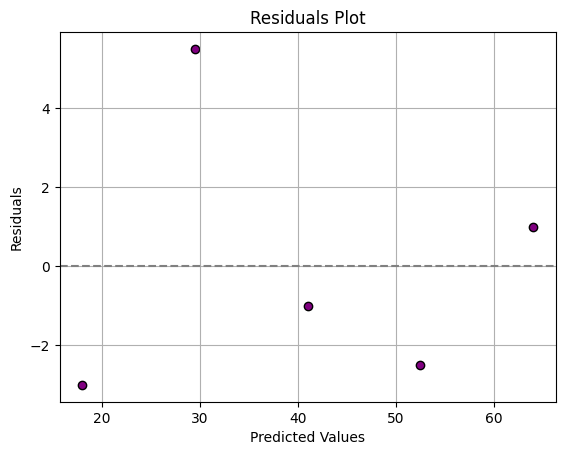

Predicted Values: [18.  29.5 41.  52.5 64. ]
Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [4]:
# Question 9: Create a residuals plot for a regression model trained on this data:
# ● X = [10, 20, 30, 40, 50]
# ● Y = [15, 35, 40, 50, 65]
# Assess heteroscedasticity by examining the spread of residuals.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.scatter(Y_pred, residuals, color='purple', edgecolor='black')
plt.axhline(y=0, color='gray', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

print("Predicted Values:", Y_pred)
print("Residuals:", residuals)


Question 10: Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.
  - To build a robust regression model for predicting house prices, it is important to address both heteroscedasticity and multicollinearity.
  - Because they can negatively impact model accuracy and interpretability.
  - Step 1. Handling Heteroscedasticity:-
    - Apply a log or square root transformation to the house prices to stabilize variance.
    - Assign weights to observations based on the inverse of their error variance.
  - Step 2. Handling Multicollinearity:-
    - Identify highly correlated features using VIF.
    - If VIF value greater than 5 or 10 it indicates multicollinearity.
    - Remove or combine correlated variables.
    - Apply Ridge Regression or Lasso Regression, which reduce the impact of multicollinearity.